<a href="https://colab.research.google.com/github/2115425Amar/First-ML-Project/blob/main/FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***What is Feature Engineering | Day 23 | 100 Days of Machine Learning***

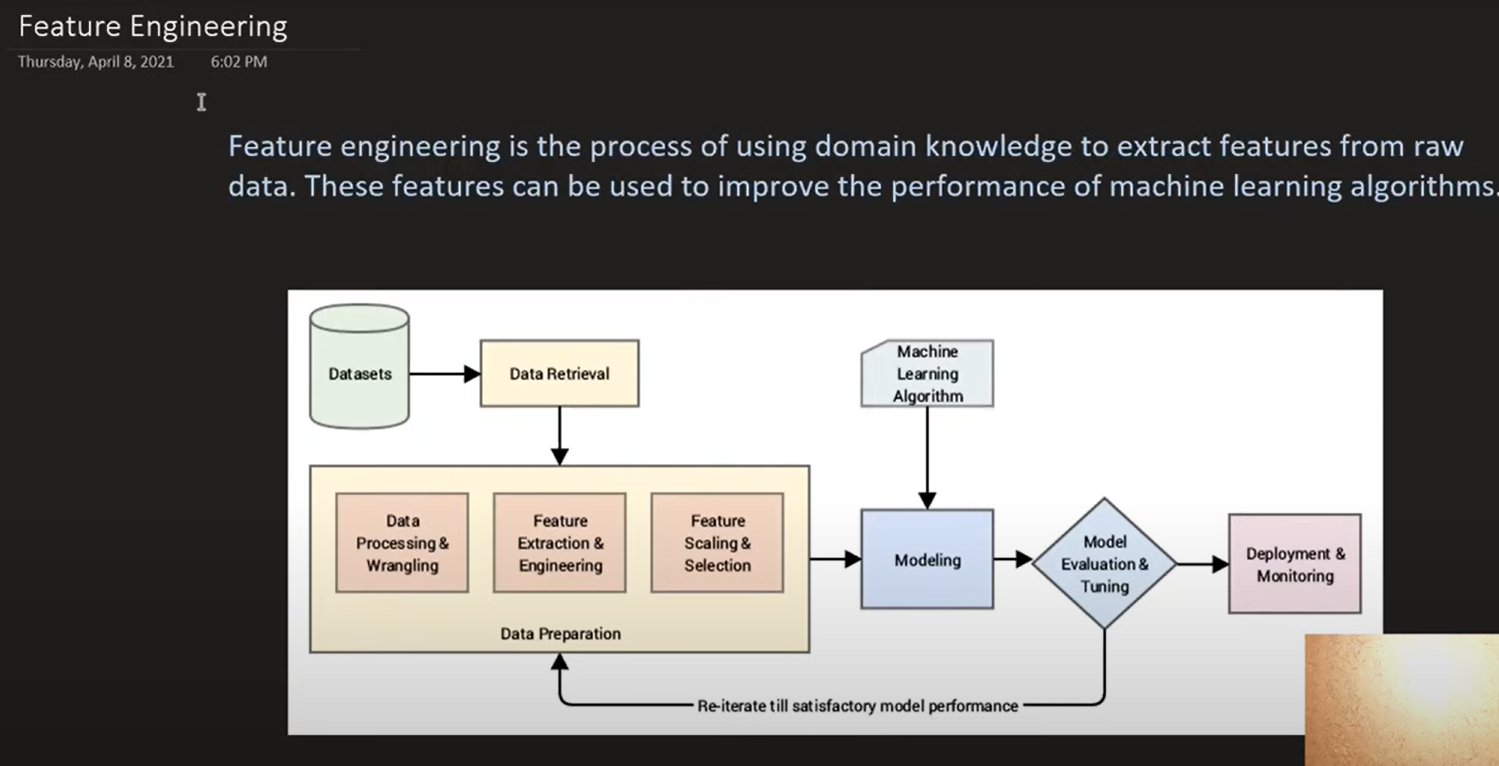

In [ ]:
from IPython.display import Image
Image('bp.png')

Feature Scaling - Standardization | Day 24 |*italicized text*

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df = df.iloc[:, 2:]  # 2 col se sabhi    iloc stands for "integer location".

In [10]:
df.sample(5)

,Age,EstimatedSalary,Purchased
157,29,75000,0
133,21,68000,0
340,53,104000,1
66,24,19000,0
187,33,41000,0


Train test **split**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                       test_size = 0.3,
                                                    random_state=0)


Yeh code `scikit-learn` library ka ek function `train_test_split` use kar raha hai jo machine learning mein data ko training aur testing sets mein split karne ke liye kaam aata hai. Samjhaun deta hoon step-by-step:

1. **train_test_split**: Yeh function data ko randomly training aur testing parts mein baant-ta hai. Isse humein apne model ko train aur test karne ke liye alag-alag data milta hai.

2. **Parameters**:
   - `df.drop('Purchased', axis=1)`: Yeh part `df` (dataframe) mein se 'Purchased' column ko hata ke baaki sab features nikaalta hai, jo `X` banate hain (input features).
   - `df['Purchased']`: Yeh part 'Purchased' column ko target variable (output labels) banata hai, jo `y` hai (labels ya output we want to predict).
   - `test_size=0.3`: Yeh parameter specify karta hai ki total data ka 30% testing ke liye use hoga aur 70% training ke liye.
   - `random_state=0`: Is parameter se data split har baar same tarike se hoga jab bhi aap code run karenge (for consistency).

3. **Return Values**:
   - `X_train`: Training data ke input features.
   - `X_test`: Testing data ke input features.
   - `y_train`: Training data ke labels.
   - `y_test`: Testing data ke labels.

### Final Result:
Is code ke baad, aapke paas training aur testing sets honge jo aapke model ko train aur evaluate karne mein madad karenge.

In [18]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [19]:
 y_train, y_test

(92     0
 223    1
 234    0
 232    1
 377    0
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 280, dtype: int64,
 132    0
 309    0
 341    0
 196    0
 246    0
       ..
 216    0
 259    1
 49     0
 238    0
 343    1
 Name: Purchased, Length: 120, dtype: int64)

In [15]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [27]:
y_train

,Purchased
92,0
223,1
234,0
232,1
377,0
...,...
323,1
192,0
117,0
47,0


In [16]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


**StandardScaler**





StandardScaler ka use kar raha hai jo scikit-learn library ka part hai. StandardScaler kaam aata hai features ko standardize ya normalize karne mein, jisse data ka scale ek jaisa ho jata hai aur model zyada effectively train ho sakta hai.**bold text**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [22]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [24]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [29]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

Yeh code `StandardScaler` ka use kar raha hai jo `scikit-learn` library ka part hai. StandardScaler kaam aata hai features ko standardize ya normalize karne mein, jisse data ka scale ek jaisa ho jata hai aur model zyada effectively train ho sakta hai.

Chaliye step-by-step samajhte hain:

1. **StandardScaler**: Yeh scaler input features ka mean (average) aur standard deviation calculate karke data ko normalize karta hai. Normalize karne ka matlab hai ki data ko center kiya jaye (mean ko zero aur standard deviation ko 1 banaya jaye), taake model har feature ko equal importance de.

2. **Code Explanation**:

   ```python
   scaler = StandardScaler()  # Scaler ko initialize kar rahe hain
   ```
   Yahaan pe humne scaler ko initialize kiya hai, ab yeh scaler data ka mean aur standard deviation calculate karne ke liye ready hai.

   ```python
   scaler.fit(X_train)  # Fit scaler to training data
   ```
   `fit(X_train)` ka matlab hai ki scaler training data (`X_train`) par mean aur standard deviation calculate karega. Yeh parameters (`mean` aur `std`) testing data ke liye bhi apply honge, kyunki train aur test set ko same scale pe laana chahiye.

   ```python
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ```
   - `transform(X_train)`: Training data ko transform ya scale karta hai, jisse data standardized form mein convert ho jata hai.
   - `transform(X_test)`: Testing data ko bhi same scaling parameters apply karta hai jo training data ke `fit` mein calculate hue the.

3. **Why Scaling?**:
   Standardization karne ka fayda ye hai ki jab features different scales mein hote hain (jaise salary in thousands aur age in years), to model confuse ho sakta hai. StandardScaler se saare features ek hi scale mein aa jaate hain, jo model ki accuracy aur performance ko improve karta hai.

4. **Variables**:
   - `X_train_scaled`: Standardized training data.
   - `X_test_scaled`: Standardized testing data.

**Summary**: Is code ke baad, aapke `X_train` aur `X_test` dono standardized form mein honge, jo model ke liye zyada effective aur balanced training aur testing environment create karta hai.

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Yahaan aap X_train_scaled aur X_test_scaled ko pandas DataFrame mein convert kar rahe hain. StandardScaler apply karne ke baad yeh arrays ke form mein the, lekin DataFrame mein convert karne se columns ka structure wapas mil jata hai, jo analysis aur debugging ke liye helpful hai.

In [32]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [34]:
import numpy as np

X_train.describe(): Yeh pandas ka describe() method hai jo X_train DataFrame ke descriptive statistics deta hai. Yeh har numerical column ke liye kuch important statistics calculate karta hai,

In [35]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


# Effect of **Scaling**

In [37]:
import matplotlib.pyplot as plt

plt.subplots(ncols=2, figsize=(12, 5)): Yeh line ek figure aur do subplots create karti hai (ek row mein 2 columns), jismein har subplot ka size 12x5 inch ka hai.
ax1 aur ax2 represent karte hain pehle aur dusre plot ko.

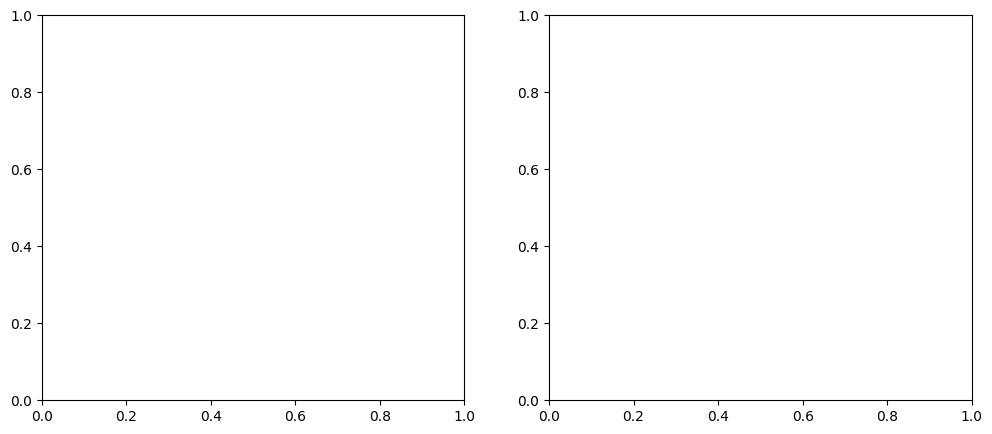

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(...): Yeh scatter plot hai jo X_train ke original values (Age aur EstimatedSalary) ke beech mein relationship show karta hai, jisse hum data ka original scale dekh sakte hain.

In [43]:
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

Text(0.5, 1.0, 'Before Scaling')

In [44]:
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")

Text(0.5, 1.0, 'After Scaling')

In [45]:
plt.show()

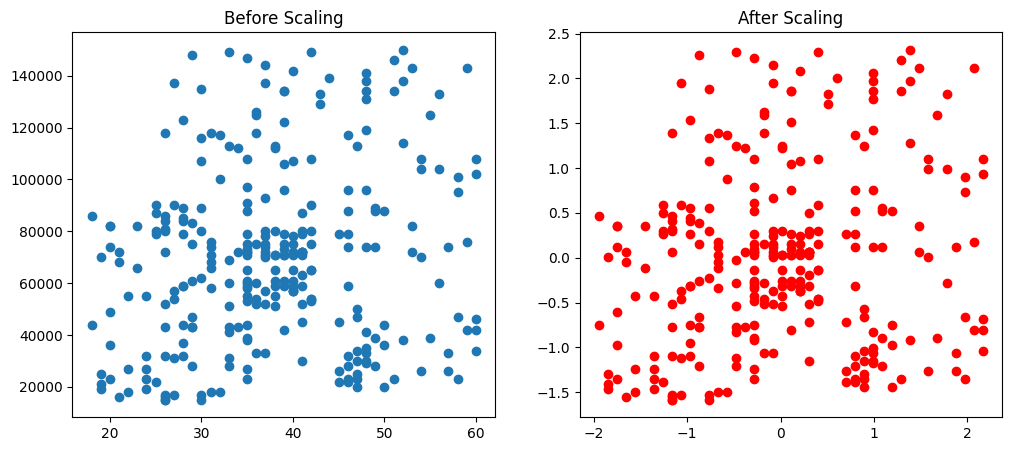

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [49]:
import seaborn as sns

Yeh code scaling ke effect ko distribution plots ke zariye dikhane ke liye hai. Yahaan seaborn library ka kdeplot (Kernel Density Estimate plot) function use kiya gaya hai jo Age aur EstimatedSalary ke distributions ko scaling ke pehle aur baad plot karta hai.

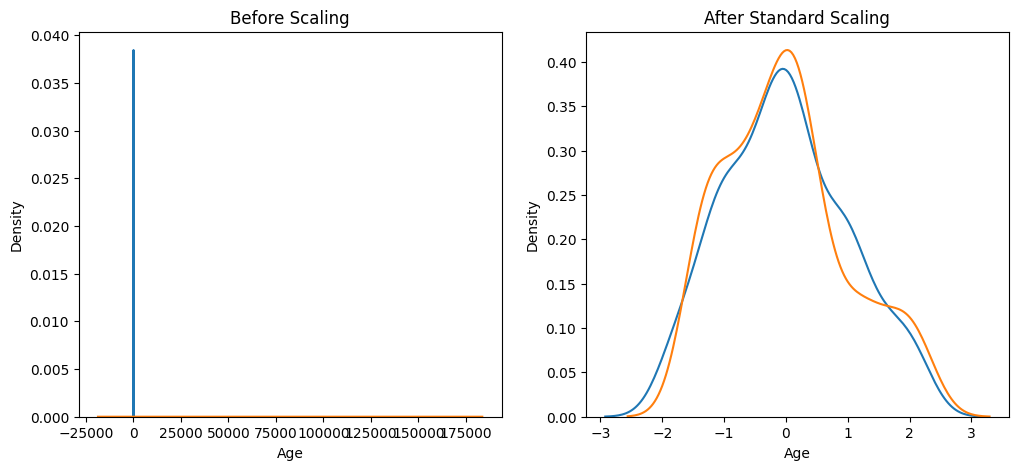

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Why scaling is important?

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [53]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [54]:
LogisticRegression()

LogisticRegression()

In [55]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


Yeh code `Logistic Regression` model train kar ke uske performance ko **original** aur **scaled data** par compare kar raha hai. Logistic Regression ek supervised learning algorithm hai jo binary classification tasks ke liye commonly use hota hai. Code mein hum `accuracy_score` metric use kar rahe hain taake dono models ki accuracy compare kar saken.

### Code Explanation:

1. **Logistic Regression Models Initialization**:

   ```python
   from sklearn.linear_model import LogisticRegression
   lr = LogisticRegression()  # Original data ke liye Logistic Regression model
   lr_scaled = LogisticRegression()  # Scaled data ke liye Logistic Regression model
   ```

   - `lr`: Original (unscaled) data par training ke liye logistic regression model.
   - `lr_scaled`: Scaled data par training ke liye logistic regression model.

2. **Training the Models**:

   ```python
   lr.fit(X_train, y_train)  # Original data par model train ho raha hai
   lr_scaled.fit(X_train_scaled, y_train)  # Scaled data par model train ho raha hai
   ```

   - `lr.fit(X_train, y_train)`: Original data (`X_train`) aur labels (`y_train`) ke saath pehla model train ho raha hai.
   - `lr_scaled.fit(X_train_scaled, y_train)`: Scaled data (`X_train_scaled`) aur labels (`y_train`) ke saath dusra model train ho raha hai.

3. **Making Predictions**:

   ```python
   y_pred = lr.predict(X_test)  # Original data ke test set par predictions
   y_pred_scaled = lr_scaled.predict(X_test_scaled)  # Scaled data ke test set par predictions
   ```

   - `y_pred`: Original data (`X_test`) par pehle model ke predictions.
   - `y_pred_scaled`: Scaled data (`X_test_scaled`) par dusre model ke predictions.

4. **Calculating Accuracy**:

   ```python
   from sklearn.metrics import accuracy_score
   print("Actual", accuracy_score(y_test, y_pred))
   print("Scaled", accuracy_score(y_test, y_pred_scaled))
   ```

   - `accuracy_score(y_test, y_pred)`: Pehle model (original data) ki accuracy calculate karta hai aur print karta hai.
   - `accuracy_score(y_test, y_pred_scaled)`: Dusre model (scaled data) ki accuracy calculate karta hai aur print karta hai.
   
   - **Output Example**:
     - `Actual`: Original data par trained model ki accuracy.
     - `Scaled`: Scaled data par trained model ki accuracy.

### Insights:

1. **Comparison of Accuracies**:
   - Agar `Scaled` model ki accuracy `Actual` se better hai, to iska matlab hai ki scaling model ki performance ko improve karti hai.
   - Kuch algorithms (jaise Logistic Regression) ke liye scaling bahut important hai, kyunki ye features ke magnitudes par depend kar sakte hain. Scaling se in models ka training aur convergence (accuracy) better ho sakta hai.

2. **Practical Takeaway**:
   - Scaling ko logistic regression jaise algorithms mein usually improve accuracy aur consistency ke liye apply karna chahiye, especially jab features ka range ya units alag-alag ho.

# DecisionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [60]:
dt.fit(X_train,y_train)    # Original data par model training
dt_scaled.fit(X_train_scaled,y_train)   # Scaled data par model training

DecisionTreeClassifier()

In [61]:
y_pred = dt.predict(X_test)  # Original data ke test set par predictions
y_pred_scaled = dt_scaled.predict(X_test_scaled)  # Scaled data ke test set par predictions

In [62]:
print("Actual",accuracy_score(y_test,y_pred))  #Original data (X_test) par pehle model ke predictions.
print("Scaled",accuracy_score(y_test,y_pred_scaled))  #Scaled data (X_test_scaled) par dusre model ke predictions.

Actual 0.875
Scaled 0.8583333333333333


Insights:
No Impact of Scaling on Decision Trees:

Decision Trees scaling ke liye insensitive hain, kyunki ye feature ke absolute values par depend nahi karte; ye sirf feature values ko split points ke roop mein use karte hain. Isliye, Actual aur Scaled dono models mein same accuracy hai.
Yeh behavior Decision Trees ke alawa kuch aur algorithms, jaise Random Forests aur Gradient Boosting trees mein bhi dekhne ko milta hai.
Conclusion:

 Decision Trees mein scaling zaroori nahi hoti, kyunki ye features ke magnitude par rely nahi karte.

**Decision Tree Algorithm** ek supervised learning technique hai jo classification aur regression dono tasks ke liye use hoti hai. Decision Trees hierarchical structure mein decision-making ke liye kaam karta hai, jahan data ko feature values ke basis par splits mein organize kiya jata hai. Iska output ek tree structure mein hota hai jo root node se leaf nodes tak split points aur decisions ko represent karta hai.

### Key Concepts in Decision Tree Algorithm

1. **Root Node**:
   - Yeh starting point hota hai jahan se tree ban na shuru hota hai. Is node mein sabse pehla feature choose kiya jata hai jiske basis par data split hoga.

2. **Decision Nodes**:
   - Yeh woh internal nodes hain jo intermediate decisions lete hain aur data ko further split karte hain based on certain feature conditions.

3. **Leaf Nodes**:
   - Leaf nodes represent karte hain final outcome ko. In nodes par aur splits nahi hota; ye directly prediction ya class assign karte hain.

5. **Gini Impurity and Entropy**:
   - Splitting ke liye tree algorithm har feature par score calculate karta hai using either Gini Impurity ya Entropy (information gain). Jitna low impurity ya high information gain, utni best splitting condition hoti hai.

6. **Pruning**:
   - Decision Trees overfitting se bachane ke liye **pruning** technique use karte hain. Pruning mein extra branches ko remove kiya jata hai jo training data mein hi achhi prediction kar rahe the lekin unseen data mein generalize nahi kar sakte.

### How Decision Tree Works (Step-by-Step):

1. **Select the Best Feature**:
   - Har feature ke basis par data ko split karke **Gini Impurity** ya **Entropy** calculate ki jati hai. Jis feature se best split (lowest impurity/highest information gain) aata hai, usse root node banaya jata hai.
   
2. **Split Data into Branches**:
   - Best feature ko select karne ke baad data ko us feature ke basis par split kiya jata hai aur naye nodes bante hain. Yeh nodes phir se same process follow karte hain.

3. **Recursive Splitting**:
   - Tree recursively data ko split karta rehta hai jab tak saare features use na ho jayein ya impurity zero na ho jaye.

4. **Stopping Criteria**:
   - Tree kuch stopping criteria par rukta hai, jese maximum depth ya minimum samples per leaf. Agar ye criteria meet hote hain, toh aur splits nahi hote.

5. **Prediction**:
   - Ek new input ko predict karte waqt tree mein root node se start karke har node ke conditions ko check karte hain aur us input ko us branch par follow karte hain jo satisfy hota hai, jab tak leaf node par nahi pahunch jaate. Leaf node ka value prediction ya class represent karta hai.

### Example of Decision Tree for Classification

Imagine ek dataset jisme hum "Weather" aur "Temperature" ke basis par predict karna chahte hain ki "Play" (Yes/No) possible hai ya nahi:

| Weather | Temperature | Play |
|---------|-------------|------|
| Sunny   | Hot         | No   |
| Overcast| Hot         | Yes  |
| Rainy   | Mild        | Yes  |
| Sunny   | Cool        | Yes  |
| Rainy   | Cool        | No   |

#### Step-by-Step:

1. **Root Node Selection**:
   - Algorithm features `Weather` aur `Temperature` ke upar impurity ya information gain calculate karega. Assume `Weather` best feature select hota hai.

2. **Split on Weather**:
   - `Weather` ke basis par 3 branches banti hain - `Sunny`, `Overcast`, `Rainy`.

3. **Further Splitting**:
   - Phir `Sunny` aur `Rainy` par further split hota hai based on `Temperature`.

4. **Final Decision**:
   - Har leaf node pe `Play` (Yes/No) ka prediction store hota hai.

### Advantages of Decision Trees:

- **Simple to Interpret**: Tree structure ko human-understandable aur interpretable hota hai.
- **Non-Linear Relationships**: Decision trees handle kar sakte hain non-linear relationships in features.
- **No Scaling Required**: Unlike other algorithms, Decision Trees ko feature scaling ki zaroorat nahi hoti.

### Disadvantages of Decision Trees:

- **Overfitting**: Pure Decision Trees overfitting ke liye prone hote hain, especially jab tree bohot deep ho jata hai.
- **Unstable**: Small changes in data tree structure ko drastically change kar sakte hain.

### Practical Use-Cases:

- **Customer Segmentation**: Customers ko alag groups mein classify karna based on their features.
- **Medical Diagnosis**: Patients ko disease risk ke basis par classify karna.
- **Finance**: Loan approval ya fraud detection mein decision trees ka use hota hai.

Decision Trees ke aur bhi complex versions, jaise Random Forests aur Gradient Boosted Trees, ko large datasets aur complex patterns ke liye use kiya jata hai.

In [63]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


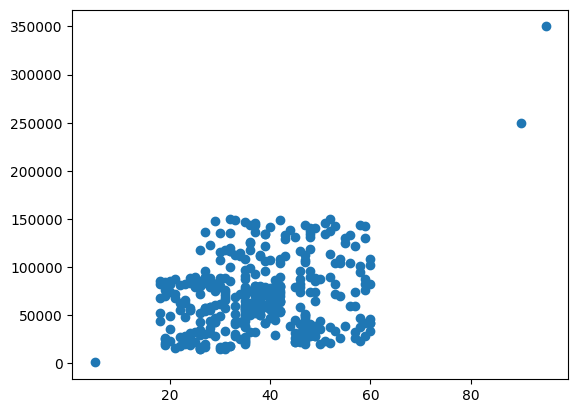

In [70]:
plt.scatter(df['Age'], df['EstimatedSalary'])

# Effect of Outlier

kuch data add kiya gya to test the Effect of Outlier

In [68]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)

In [69]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


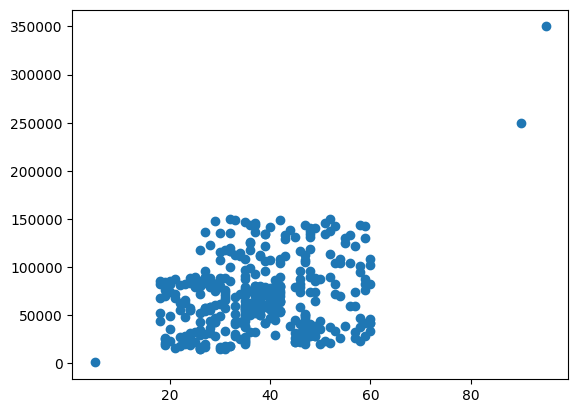

In [71]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

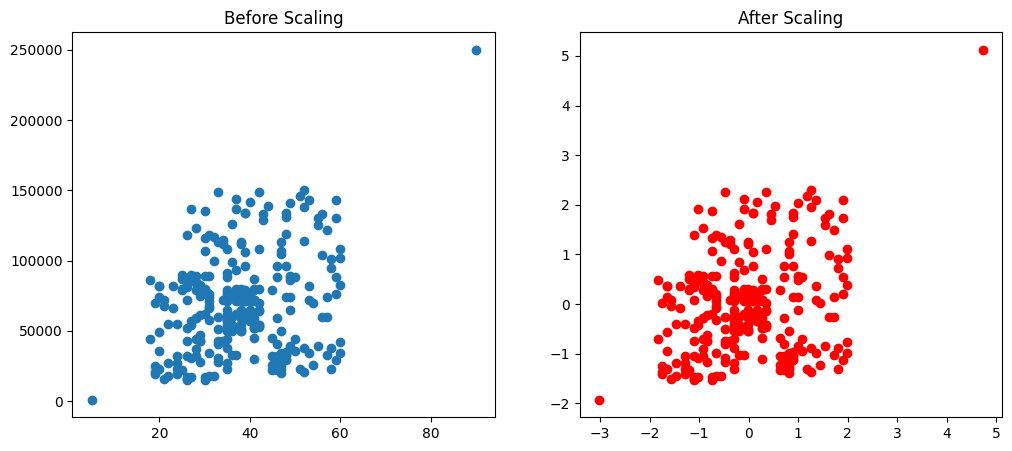

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()